In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
uber_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/uberdrive.csv")

In [ ]:
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


#Data Cleaning


In [ ]:
# to determine the dimensions of a DataFrame
uber_df.shape
shape = uber_df.shape

print("Number of rows:", shape[0])
print("Number of columns:", shape[1])


total_elements = uber_df.size

print("Total number of elements in the DataFrame:", total_elements)

Number of rows: 1156
Number of columns: 8
Total number of elements in the DataFrame: 9248


In [ ]:
# Checking Null values

uber_df.isnull().values.any()

uber_df.isnull().values.sum()

507

In [ ]:
# to remove rows with any missing values (NaN) from the DataFrame

df = uber_df.dropna()

In [ ]:
df.isnull().values.any()

False

In [ ]:
# provides descriptive statistics for the numerical columns in the DataFrame
uber_df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [ ]:
# Cleaned dataframe

df.describe()

,MILES*
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


In [ ]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [ ]:
start_destination = uber_df['START*'].dropna()
unique_start = set(start_destination)
unique_start

{'Agnew',
 'Almond',
 'Apex',
 'Arabi',
 'Arlington',
 'Arlington Park at Amberly',
 'Asheville',
 'Austin',
 'Banner Elk',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Bryson City',
 'Burtrose',
 'CBD',
 'Capitol One',
 'Cary',
 'Central',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'College Avenue',
 'Colombo',
 'Columbia Heights',
 'Congress Ave District',
 'Connecticut Avenue',
 'Convention Center District',
 'Cory',
 'Couples Glen',
 'Covington',
 'Coxville',
 'Daytona Beach',
 'Downtown',
 'Durham',
 'Eagan Park',
 'Eagle Rock',
 'East Austin',
 'East Elmhurst',
 'East Harlem',
 'Eastgate',
 'Edgehill Farms',
 'El Cerrito',
 'Elk Park',
 'Elmhurst',
 'Emeryville',
 'Fairmont',
 'Farmington Woods',
 'Fayetteville Street',
 'Financial District',
 'Flatiron District',
 'Florence',
 'Fort Pierce',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Georgian Acres',
 'Gulfton',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Holly Springs',
 'Houston',
 'Hu

In [ ]:
len(unique_start)

176

In [ ]:
stop_destination = uber_df['STOP*'].dropna()
unique_stop = set(stop_destination)
unique_stop

{'Agnew',
 'Alief',
 'Almond',
 'Apex',
 'Arabi',
 'Arlington',
 'Arlington Park at Amberly',
 'Arts District',
 'Asheville',
 'Banner Elk',
 'Bay Farm Island',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Bryson City',
 'Burtrose',
 'Bywater',
 'CBD',
 'Capitol One',
 'Cary',
 'Cedar Hill',
 'Central',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'College Avenue',
 'Colombo',
 'Columbia Heights',
 'Congress Ave District',
 'Convention Center District',
 'Cory',
 'Covington',
 'Coxville',
 'Daytona Beach',
 'Depot Historic District',
 'Downtown',
 'Durham',
 'Eagle Rock',
 'East Elmhurst',
 'East Harlem',
 'Edgehill Farms',
 'El Cerrito',
 'Elk Park',
 'Emeryville',
 'Farmington Woods',
 'Faubourg Marigny',
 'Financial District',
 'Florence',
 'Fort Pierce',
 'French Quarter',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Gramercy-Flatiron',
 'Greater Greenspoint',
 'Gulfton',
 'Harden Place',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Hog Island',

In [ ]:
len(unique_stop)

187

In [ ]:
df[df['START*']== 'San Francisco']

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
362,05-09-2016 14:39,05-09-2016 15:06,Business,San Francisco,Palo Alto,20.5,Between Offices
440,6/14/2016 16:09,6/14/2016 16:39,Business,San Francisco,Emeryville,11.6,Meeting
917,11-07-2016 19:17,11-07-2016 19:57,Business,San Francisco,Berkeley,13.2,Between Offices
919,11-08-2016 12:16,11-08-2016 12:49,Business,San Francisco,Berkeley,11.3,Meeting
927,11-09-2016 18:40,11-09-2016 19:17,Business,San Francisco,Oakland,12.7,Customer Visit
933,11-10-2016 15:17,11-10-2016 15:22,Business,San Francisco,Oakland,9.9,Temporary Site
966,11/15/2016 20:44,11/15/2016 21:00,Business,San Francisco,Berkeley,11.8,Temporary Site


## ***Data Visualization***

Distribution of Miles Driven by Number of Cars

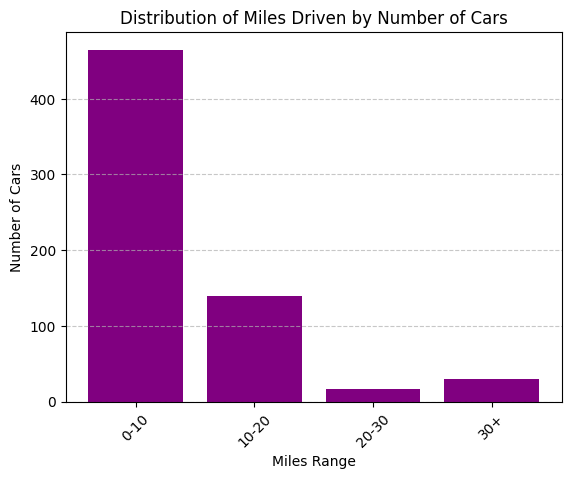

In [ ]:
import matplotlib.pyplot as plt

# Convert the 'MILES*' column to numeric values without modifying the original DataFrame
df_copy = df.copy()
df_copy['MILES*'] = pd.to_numeric(df_copy['MILES*'], errors='coerce')

# Create bins for the ranges
bins = [0, 10, 20, 30, max(df_copy['MILES*'])]

# Create labels for the bins
labels = ['0-10', '10-20', '20-30', '30+']

# Create a new column 'Miles Range' to categorize the miles into the specified bins
df_copy['Miles Range'] = pd.cut(df_copy['MILES*'], bins=bins, labels=labels, right=False)

# Group by 'Miles Range' and count the number of occurrences
mile_ranges_count = df_copy.groupby('Miles Range').size().reset_index(name='Number of Cars')

# Plot the bar chart
plt.bar(mile_ranges_count['Miles Range'], mile_ranges_count['Number of Cars'], color='purple')
plt.xlabel('Miles Range')
plt.ylabel('Number of Cars')
plt.title('Distribution of Miles Driven by Number of Cars')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()


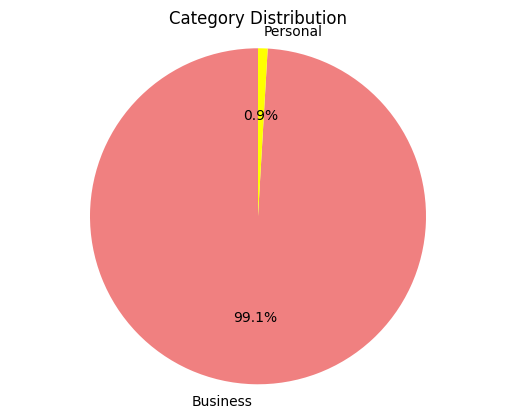

In [ ]:
# Group by 'CATEGORY' and count the number of occurrences
category_distribution = df['CATEGORY*'].value_counts()

# Pie chart showing Percentage distribution of categories
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'yellow'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Category Distribution')
plt.show()

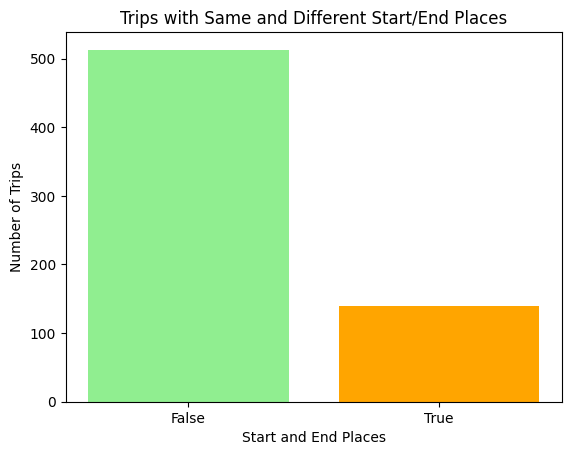

In [ ]:
# Create a new column 'Same Place' to indicate if the start and end places are the same
uber_df['Same Place'] = df['START*'] == df['STOP*']

# Count the occurrences of 'Same Place'
place_distribution = uber_df['Same Place'].value_counts()

# Plot the bar chart
plt.bar(place_distribution.index.astype(str), place_distribution, color=['lightgreen', 'orange'])
plt.xlabel('Start and End Places')
plt.ylabel('Number of Trips')
plt.title('Trips with Same and Different Start/End Places')
plt.show()

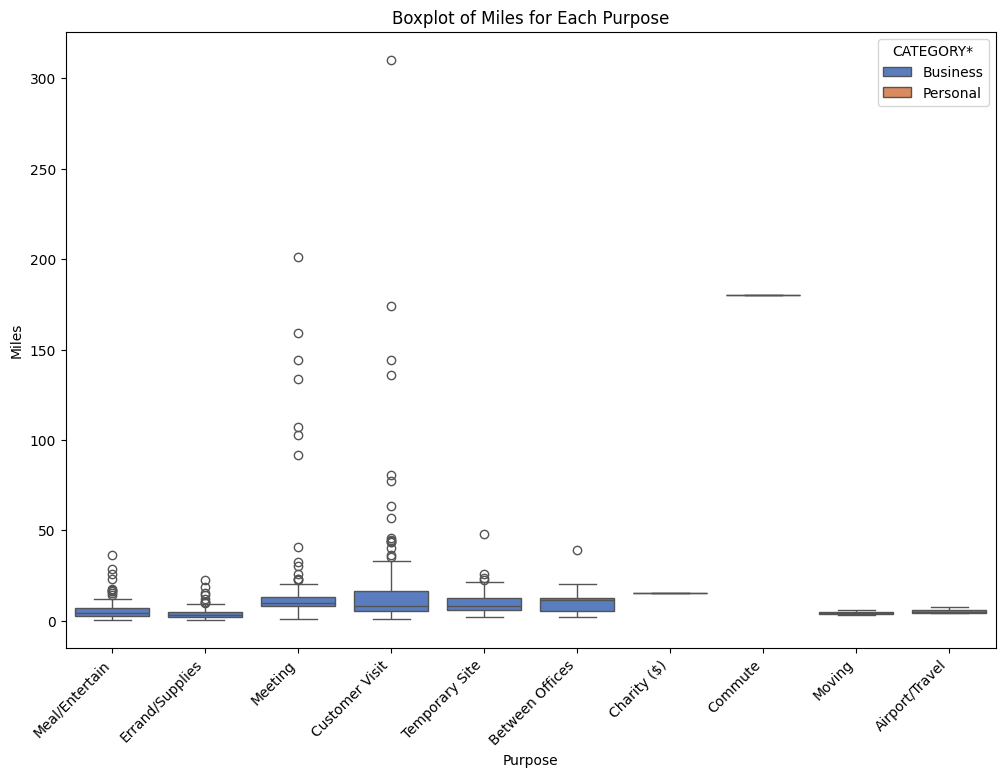

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the boxplot with hue
sns.boxplot(x='PURPOSE*', y='MILES*', hue='CATEGORY*', data=df, palette='muted')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Purpose')
plt.ylabel('Miles')
plt.title('Boxplot of Miles for Each Purpose')

# Show the plot
plt.show()


In [ ]:
df[df['PURPOSE*'] == 'Commute']

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
559,7/17/2016 12:20,7/17/2016 15:25,Personal,Boone,Cary,180.2,Commute


In [ ]:
# List of columns to remove
columns_to_remove = ['Miles Range', 'Same Place']

# Display the DataFrame after dropping columns
print(df)

           START_DATE*         END_DATE* CATEGORY*            START*  \
0     01-01-2016 21:11  01-01-2016 21:17  Business       Fort Pierce   
2     01-02-2016 20:25  01-02-2016 20:38  Business       Fort Pierce   
3     01-05-2016 17:31  01-05-2016 17:45  Business       Fort Pierce   
4     01-06-2016 14:42  01-06-2016 15:49  Business       Fort Pierce   
5     01-06-2016 17:15  01-06-2016 17:19  Business   West Palm Beach   
...                ...               ...       ...               ...   
1150   12/31/2016 1:07   12/31/2016 1:14  Business           Karachi   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Karachi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   

                 STOP*  MILES*         PURPOSE*  
0          Fort Pierce     5.1   Meal/Entertain  
2          Fort Pierce     4.8  Err

<ipython-input-22-1f3ab495a097>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy.loc[:, 'START_DATE*'] = pd.to_datetime(df_copy['START_DATE*'])
<ipython-input-22-1f3ab495a097>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy.loc[:, 'END_DATE*'] = pd.to_datetime(df_copy['END_DATE*'])


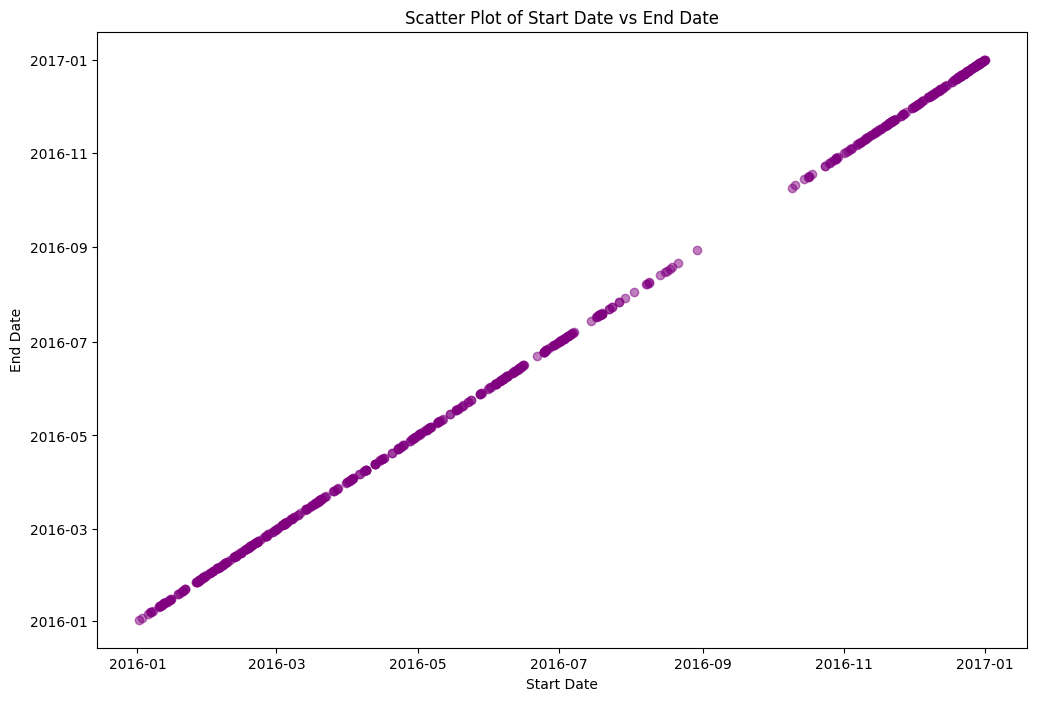

In [ ]:
# Convert 'START_DATE*' and 'END_DATE*' columns to datetime using .loc
df_copy.loc[:, 'START_DATE*'] = pd.to_datetime(df_copy['START_DATE*'])
df_copy.loc[:, 'END_DATE*'] = pd.to_datetime(df_copy['END_DATE*'])

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df_copy['START_DATE*'], df_copy['END_DATE*'], alpha=0.5, color='purple')
plt.title('Scatter Plot of Start Date vs End Date')
plt.xlabel('Start Date')
plt.ylabel('End Date')
plt.show()


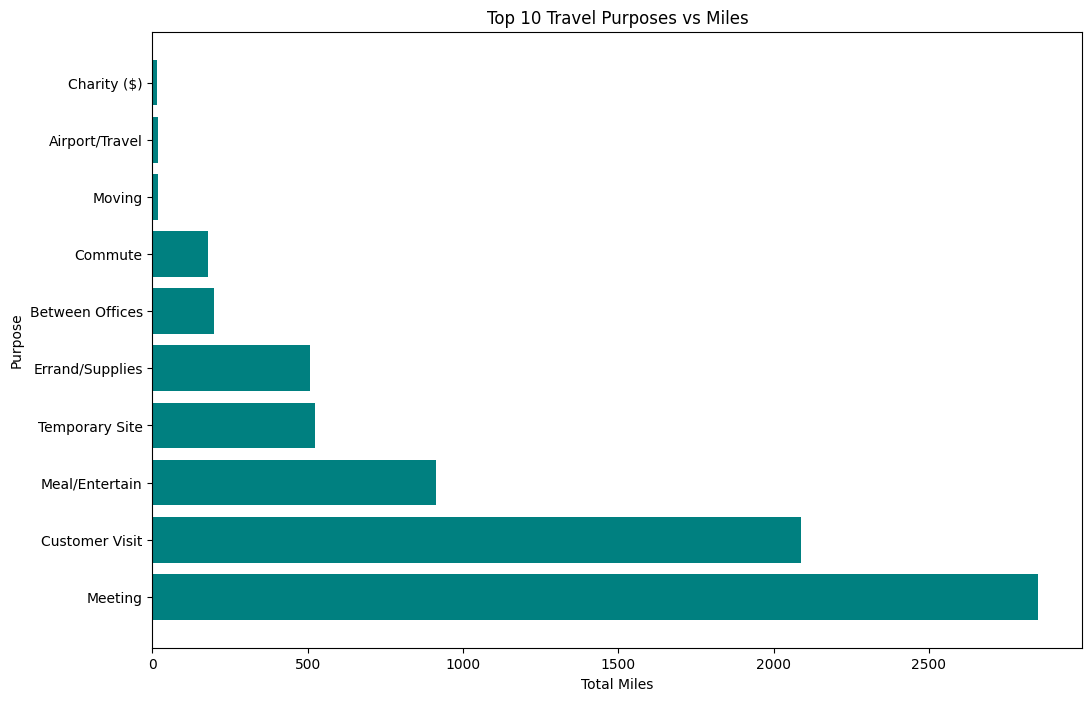

In [ ]:
purpose_miles = df.groupby('PURPOSE*')['MILES*'].sum().reset_index()

# Sort the DataFrame by miles in descending order
purpose_miles = purpose_miles.sort_values(by='MILES*', ascending=False)

# Select the top 5 purposes
top_10_purposes = purpose_miles.head(10)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_10_purposes['PURPOSE*'], top_10_purposes['MILES*'], color='teal')
plt.xlabel('Total Miles')
plt.ylabel('Purpose')
plt.title('Top 10 Travel Purposes vs Miles')
plt.show()